In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import preprocessor as p
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataset=pd.read_csv("data1.csv",header=None)
dataset

,0,1,2,3,4
0,1,",rt @sza: its like w less ppl outside we all ...",0,NaN,NaN
1,2,",rt @realrarety: hey everybody imma dirty bitch",0,NaN,NaN
2,3,",rt @aria66369199: do not mess with a girl of...",0,NaN,NaN
3,4,",@rydo90 same https://t.co/mimjh0kky2",1,NaN,NaN
4,5,",rt @faiza_baby: this is so so sad. how is an...",0,NaN,NaN
...,...,...,...,...,...
995,996,",rt @qikipedia: you are more likely to be kil...",1,NaN,NaN
996,997,",this sounds fucking wild and horrific. #rele...",1,NaN,NaN
997,998,",film, and art.",1,NaN,NaN
998,999,",i'm bout to go live",0,NaN,NaN


In [3]:
dataset.drop([0,3,4],axis=1,inplace=True)
dataset

,1,2
0,",rt @sza: its like w less ppl outside we all ...",0
1,",rt @realrarety: hey everybody imma dirty bitch",0
2,",rt @aria66369199: do not mess with a girl of...",0
3,",@rydo90 same https://t.co/mimjh0kky2",1
4,",rt @faiza_baby: this is so so sad. how is an...",0
...,...,...
995,",rt @qikipedia: you are more likely to be kil...",1
996,",this sounds fucking wild and horrific. #rele...",1
997,",film, and art.",1
998,",i'm bout to go live",0


In [4]:
dataset

,1,2
0,",rt @sza: its like w less ppl outside we all ...",0
1,",rt @realrarety: hey everybody imma dirty bitch",0
2,",rt @aria66369199: do not mess with a girl of...",0
3,",@rydo90 same https://t.co/mimjh0kky2",1
4,",rt @faiza_baby: this is so so sad. how is an...",0
...,...,...
995,",rt @qikipedia: you are more likely to be kil...",1
996,",this sounds fucking wild and horrific. #rele...",1
997,",film, and art.",1
998,",i'm bout to go live",0


In [5]:
dataSetXFeatures=  dataset[1]
dataSetXFeatures

0       ,rt @sza: its like w less ppl outside we all ...
1        ,rt @realrarety: hey everybody imma dirty bitch
2       ,rt @aria66369199: do not mess with a girl of...
3                  ,@rydo90 same https://t.co/mimjh0kky2
4       ,rt @faiza_baby: this is so so sad. how is an...
                             ...                        
995     ,rt @qikipedia: you are more likely to be kil...
996     ,this sounds fucking wild and horrific. #rele...
997                                      ,film, and art.
998                                 ,i'm bout to go live
999     ,rt @gabimorinn: idk how to explain this but ...
Name: 1, Length: 1000, dtype: object

In [6]:
# dataSetXFeatures=p.clean(dataSetXFeatures)
# dataSetXFeatures
dataSetXFeatures=[p.clean(s) for s in dataSetXFeatures]
# for ix,i in enumerate(dataSetXFeatures):
#     dataSetXFeatures[ix]=p.clean(i)
    
dataSetXFeatures[:10]

[',rt : its like w less ppl outside we all have a chance to let our auras breathe and feel our true feelings instead of being tied into s',
 ',rt : hey everybody imma dirty bitch',
 ',rt : do not mess with a girl of short height. feet inch but attitude feet .',
 ', same',
 ',rt : this is so so sad. how is anyone meant to find a new job in this climate?',
 ', happy birthday tout damsel wishing you long life and prosperity have sense this time',
 ', mins ago lol',
 ',rt : me and my virgin wife sneaking out of our wedding to finally have sex',
 ', why is he high like this',
 ',rt : corona time']

In [7]:
import re
def clean_str(string):
    string = re.sub(r",rt :", "", string)
    string = re.sub(r",https://", "", string)
    string = re.sub(r",://", "", string)
    string = re.sub(r",\\", "", string)
    
    return string.strip().lower()

In [8]:
dataSetXFeatures=[clean_str(s) for s in dataSetXFeatures]
dataSetXFeatures

['its like w less ppl outside we all have a chance to let our auras breathe and feel our true feelings instead of being tied into s',
 'hey everybody imma dirty bitch',
 'do not mess with a girl of short height. feet inch but attitude feet .',
 ', same',
 'this is so so sad. how is anyone meant to find a new job in this climate?',
 ', happy birthday tout damsel wishing you long life and prosperity have sense this time',
 ', mins ago lol',
 'me and my virgin wife sneaking out of our wedding to finally have sex',
 ', why is he high like this',
 'corona time',
 'i pray that every individual be protected in jesus name, amen!',
 'quarantine idea: go through your camera roll and finally delete all that extra shit you have lmao',
 ', lol, then why did you save a copy of it???',
 'why coronavirus gotta hit right when i started getting my shit together',
 ',omfg',
 "did you do a story about makro when investors packed stores without musk's and gives, buying in bulks after their overseas",
 ', s

In [9]:
labelList=dataset[2]
labelList

0      0
1      0
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    0
Name: 2, Length: 1000, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataSetXFeatures, labelList, test_size=0.2, random_state=0)



In [11]:
X_train

[', apparently not',
 ",damn you can't schedule duplicate tweets... welp.",
 '*five minutes into quarantine w/the homies*',
 ",height : '4shoe size : zodiac sign : scorpiotattoos : nonepiercings : fav color : sky bluefav drink : cokeanyone who sees this tweet has to quote it with their own",
 'was he waiting on a standing ovation?',
 'no school for the rest of the year?,,,sooo am i getting my diploma by mail orrr?',
 ', that leaf picture is amazing!!',
 ', you already knowww',
 ',.... north scottsdale fit body boot camp',
 ',not end of world, according to christians',
 'i dont got trust issues i got ive seen this type shit before issues and ill be damned if i go through it again..',
 ',help me make a difference for a cause i care about.',
 ',thats the only reason',
 ', just read the summary. scary stuff indeed. really makes me feel better about the extreme measures that are happening. we all need to do our part.',
 ", i can't... not...",
 "stay safe guys, love y'all",
 ",now i'm broken

In [12]:
trainText=X_train
print(len(trainText))
trainText

800


[', apparently not',
 ",damn you can't schedule duplicate tweets... welp.",
 '*five minutes into quarantine w/the homies*',
 ",height : '4shoe size : zodiac sign : scorpiotattoos : nonepiercings : fav color : sky bluefav drink : cokeanyone who sees this tweet has to quote it with their own",
 'was he waiting on a standing ovation?',
 'no school for the rest of the year?,,,sooo am i getting my diploma by mail orrr?',
 ', that leaf picture is amazing!!',
 ', you already knowww',
 ',.... north scottsdale fit body boot camp',
 ',not end of world, according to christians',
 'i dont got trust issues i got ive seen this type shit before issues and ill be damned if i go through it again..',
 ',help me make a difference for a cause i care about.',
 ',thats the only reason',
 ', just read the summary. scary stuff indeed. really makes me feel better about the extreme measures that are happening. we all need to do our part.',
 ", i can't... not...",
 "stay safe guys, love y'all",
 ",now i'm broken

In [13]:
trainText=[s.lower() for s in trainText]
trainText

[', apparently not',
 ",damn you can't schedule duplicate tweets... welp.",
 '*five minutes into quarantine w/the homies*',
 ",height : '4shoe size : zodiac sign : scorpiotattoos : nonepiercings : fav color : sky bluefav drink : cokeanyone who sees this tweet has to quote it with their own",
 'was he waiting on a standing ovation?',
 'no school for the rest of the year?,,,sooo am i getting my diploma by mail orrr?',
 ', that leaf picture is amazing!!',
 ', you already knowww',
 ',.... north scottsdale fit body boot camp',
 ',not end of world, according to christians',
 'i dont got trust issues i got ive seen this type shit before issues and ill be damned if i go through it again..',
 ',help me make a difference for a cause i care about.',
 ',thats the only reason',
 ', just read the summary. scary stuff indeed. really makes me feel better about the extreme measures that are happening. we all need to do our part.',
 ", i can't... not...",
 "stay safe guys, love y'all",
 ",now i'm broken

In [14]:
testText=X_test
print(len(testText))
testText

200


[', its distancing not testing that is critical.need testing for health workers &amp; st responders. then at risk symptomatic ie comorbities &amp;elderly.everyone else stay home &amp; let flu pass. hrs after fever breaks. a test doesnt stop that and could risk flooding hospitals',
 'my best friends grandfather died this weekend, and they just got news that he was positive for coronavirus. her dad is als',
 "% hasn't voted yet and un announced considering electoral fraude investigati",
 'every friday, indonesians are protesting outside the indian embassy over the massacre of muslims in ne delhi. indonesia has',
 ',mhm that fruit wasnt sweet enough',
 'school: closeddisney: closedevents: cancelledsmall businesses: closedoutback steakhouse: stayk and loybstah is ba',
 'thanks kaws x_x',
 'donald trump is going to run on i gave everyone $5000 and like million people who dont really follow politics at all are',
 "sanskrit is not the mother of all languages!sanskrit is the child of all fathe

In [15]:
testText=[s.lower() for s in testText]
testText

[', its distancing not testing that is critical.need testing for health workers &amp; st responders. then at risk symptomatic ie comorbities &amp;elderly.everyone else stay home &amp; let flu pass. hrs after fever breaks. a test doesnt stop that and could risk flooding hospitals',
 'my best friends grandfather died this weekend, and they just got news that he was positive for coronavirus. her dad is als',
 "% hasn't voted yet and un announced considering electoral fraude investigati",
 'every friday, indonesians are protesting outside the indian embassy over the massacre of muslims in ne delhi. indonesia has',
 ',mhm that fruit wasnt sweet enough',
 'school: closeddisney: closedevents: cancelledsmall businesses: closedoutback steakhouse: stayk and loybstah is ba',
 'thanks kaws x_x',
 'donald trump is going to run on i gave everyone $5000 and like million people who dont really follow politics at all are',
 "sanskrit is not the mother of all languages!sanskrit is the child of all fathe

In [16]:
tk = Tokenizer(num_words = None, filters="", lower=True, char_level=True, oov_token='UNK')

In [17]:
tk.fit_on_texts(trainText)

In [18]:
tk.word_index

{'UNK': 1,
 ' ': 2,
 'e': 3,
 't': 4,
 'o': 5,
 'a': 6,
 'i': 7,
 'n': 8,
 's': 9,
 'r': 10,
 'h': 11,
 'l': 12,
 'd': 13,
 'u': 14,
 'm': 15,
 'c': 16,
 'y': 17,
 'g': 18,
 'w': 19,
 'p': 20,
 'f': 21,
 'b': 22,
 'k': 23,
 '.': 24,
 ',': 25,
 'v': 26,
 "'": 27,
 'j': 28,
 ':': 29,
 '?': 30,
 '!': 31,
 '-': 32,
 '/': 33,
 'x': 34,
 'q': 35,
 ';': 36,
 'z': 37,
 '&': 38,
 '"': 39,
 '(': 40,
 ')': 41,
 '1': 42,
 '*': 43,
 '0': 44,
 '2': 45,
 '3': 46,
 '9': 47,
 ']': 48,
 '%': 49,
 '[': 50,
 '4': 51,
 '5': 52,
 '$': 53,
 '7': 54,
 '_': 55,
 '+': 56,
 '6': 57,
 '^': 58,
 '8': 59,
 '~': 60,
 '=': 61}

In [19]:
alphabet="abcdefghijklmnopqrstuvwxyz0123456789 ,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1
char_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '0': 27,
 '1': 28,
 '2': 29,
 '3': 30,
 '4': 31,
 '5': 32,
 '6': 33,
 '7': 34,
 '8': 35,
 '9': 36,
 ' ': 37,
 ',': 38,
 ';': 39,
 '.': 40,
 '!': 41,
 '?': 42,
 ':': 43,
 "'": 44,
 '"': 45,
 '/': 46,
 '\\': 47,
 '|': 48,
 '_': 49,
 '@': 50,
 '#': 51,
 '$': 52,
 '%': 53,
 '^': 54,
 '&': 55,
 '*': 56,
 '~': 57,
 '`': 58,
 '+': 59,
 '-': 60,
 '=': 61,
 '<': 62,
 '>': 63,
 '(': 64,
 ')': 65,
 '[': 66,
 ']': 67,
 '{': 68,
 '}': 69}

In [20]:
tk.word_index = char_dict 
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [21]:
tk.word_index

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '0': 27,
 '1': 28,
 '2': 29,
 '3': 30,
 '4': 31,
 '5': 32,
 '6': 33,
 '7': 34,
 '8': 35,
 '9': 36,
 ' ': 37,
 ',': 38,
 ';': 39,
 '.': 40,
 '!': 41,
 '?': 42,
 ':': 43,
 "'": 44,
 '"': 45,
 '/': 46,
 '\\': 47,
 '|': 48,
 '_': 49,
 '@': 50,
 '#': 51,
 '$': 52,
 '%': 53,
 '^': 54,
 '&': 55,
 '*': 56,
 '~': 57,
 '`': 58,
 '+': 59,
 '-': 60,
 '=': 61,
 '<': 62,
 '>': 63,
 '(': 64,
 ')': 65,
 '[': 66,
 ']': 67,
 '{': 68,
 '}': 69,
 'UNK': 70}

In [22]:
trainSequence = tk.texts_to_sequences(trainText)
trainSequence[:2]

[[38, 37, 1, 16, 16, 1, 18, 5, 14, 20, 12, 25, 37, 14, 15, 20],
 [38,
  4,
  1,
  13,
  14,
  37,
  25,
  15,
  21,
  37,
  3,
  1,
  14,
  44,
  20,
  37,
  19,
  3,
  8,
  5,
  4,
  21,
  12,
  5,
  37,
  4,
  21,
  16,
  12,
  9,
  3,
  1,
  20,
  5,
  37,
  20,
  23,
  5,
  5,
  20,
  19,
  40,
  40,
  40,
  37,
  23,
  5,
  12,
  16,
  40]]

In [23]:
testSequence = tk.texts_to_sequences(testText)
testSequence[:2]

[[38,
  37,
  9,
  20,
  19,
  37,
  4,
  9,
  19,
  20,
  1,
  14,
  3,
  9,
  14,
  7,
  37,
  14,
  15,
  20,
  37,
  20,
  5,
  19,
  20,
  9,
  14,
  7,
  37,
  20,
  8,
  1,
  20,
  37,
  9,
  19,
  37,
  3,
  18,
  9,
  20,
  9,
  3,
  1,
  12,
  40,
  14,
  5,
  5,
  4,
  37,
  20,
  5,
  19,
  20,
  9,
  14,
  7,
  37,
  6,
  15,
  18,
  37,
  8,
  5,
  1,
  12,
  20,
  8,
  37,
  23,
  15,
  18,
  11,
  5,
  18,
  19,
  37,
  55,
  1,
  13,
  16,
  39,
  37,
  19,
  20,
  37,
  18,
  5,
  19,
  16,
  15,
  14,
  4,
  5,
  18,
  19,
  40,
  37,
  20,
  8,
  5,
  14,
  37,
  1,
  20,
  37,
  18,
  9,
  19,
  11,
  37,
  19,
  25,
  13,
  16,
  20,
  15,
  13,
  1,
  20,
  9,
  3,
  37,
  9,
  5,
  37,
  3,
  15,
  13,
  15,
  18,
  2,
  9,
  20,
  9,
  5,
  19,
  37,
  55,
  1,
  13,
  16,
  39,
  5,
  12,
  4,
  5,
  18,
  12,
  25,
  40,
  5,
  22,
  5,
  18,
  25,
  15,
  14,
  5,
  37,
  5,
  12,
  19,
  5,
  37,
  19,
  20,
  1,
  25,
  37,
  8,
  15,
  13,
  5,
  37,
  55

In [24]:
temp=[]
for ix,s in enumerate(trainSequence):
    temp.append(len(s))
max(temp)

284

In [25]:
trainData = pad_sequences(trainSequence, maxlen=300, padding='post')
print(trainData[0])

[38 37  1 16 16  1 18  5 14 20 12 25 37 14 15 20  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


In [26]:
testData = pad_sequences(testSequence, maxlen=300, padding='post')
print(testData[0])

[38 37  9 20 19 37  4  9 19 20  1 14  3  9 14  7 37 14 15 20 37 20  5 19
 20  9 14  7 37 20  8  1 20 37  9 19 37  3 18  9 20  9  3  1 12 40 14  5
  5  4 37 20  5 19 20  9 14  7 37  6 15 18 37  8  5  1 12 20  8 37 23 15
 18 11  5 18 19 37 55  1 13 16 39 37 19 20 37 18  5 19 16 15 14  4  5 18
 19 40 37 20  8  5 14 37  1 20 37 18  9 19 11 37 19 25 13 16 20 15 13  1
 20  9  3 37  9  5 37  3 15 13 15 18  2  9 20  9  5 19 37 55  1 13 16 39
  5 12  4  5 18 12 25 40  5 22  5 18 25 15 14  5 37  5 12 19  5 37 19 20
  1 25 37  8 15 13  5 37 55  1 13 16 39 37 12  5 20 37  6 12 21 37 16  1
 19 19 40 37  8 18 19 37  1  6 20  5 18 37  6  5 22  5 18 37  2 18  5  1
 11 19 40 37  1 37 20  5 19 20 37  4 15  5 19 14 20 37 19 20 15 16 37 20
  8  1 20 37  1 14  4 37  3 15 21 12  4 37 18  9 19 11 37  6 12 15 15  4
  9 14  7 37  8 15 19 16  9 20  1 12 19  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


In [27]:
catList=y_train.unique()
set(catList)

{0, 1}

In [28]:
y_train[:10]

687    1
500    1
332    1
979    1
817    1
620    0
814    0
516    1
518    1
940    1
Name: 2, dtype: int64

In [29]:
from keras.utils import to_categorical
trainClasses = to_categorical(y_train)
trainClasses[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
testClasses = to_categorical(y_test)
testClasses[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

<b>------------------------------------------------------Preprocessing is done------------------------------------------------------<b>

In [31]:
tk.word_index

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '0': 27,
 '1': 28,
 '2': 29,
 '3': 30,
 '4': 31,
 '5': 32,
 '6': 33,
 '7': 34,
 '8': 35,
 '9': 36,
 ' ': 37,
 ',': 38,
 ';': 39,
 '.': 40,
 '!': 41,
 '?': 42,
 ':': 43,
 "'": 44,
 '"': 45,
 '/': 46,
 '\\': 47,
 '|': 48,
 '_': 49,
 '@': 50,
 '#': 51,
 '$': 52,
 '%': 53,
 '^': 54,
 '&': 55,
 '*': 56,
 '~': 57,
 '`': 58,
 '+': 59,
 '-': 60,
 '=': 61,
 '<': 62,
 '>': 63,
 '(': 64,
 ')': 65,
 '[': 66,
 ']': 67,
 '{': 68,
 '}': 69,
 'UNK': 70}

In [32]:
vocab_size = len(tk.word_index)
vocab_size

70

In [33]:
embedding_weights = [] 
embedding_weights.append(np.zeros(vocab_size+1)) # first row is pad

for char, i in tk.word_index.items(): # from index 1 to 70
    onehot = np.zeros(vocab_size+1)
    onehot[i-1] = 1
    embedding_weights.append(onehot)
embedding_weights = np.array(embedding_weights)


In [34]:
print(embedding_weights.shape) # first row all 0 for PAD, 69 char, last row for UNK
embedding_weights

(71, 71)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model

In [36]:
# parameter 
input_size = 300
# vocab_size = 69
embedding_size = vocab_size+1
conv_layers = [[256, 7, 3], 
               [256, 7, 3], 
               [256, 3, -1], 
               [256, 3, -1], 
               [256, 3, -1], 
               [256, 3, 3]]

fully_connected_layers = [300, 300]
num_of_classes = 2
dropout_p = 0.2
optimizer = 'adam'
loss = 'categorical_crossentropy'

In [37]:
embedding_layer = Embedding(vocab_size+1, 
                            embedding_size,
                            input_length=input_size,
                            weights=[embedding_weights])

In [38]:
# Model 

# Input
inputs = Input(shape=(input_size,), name='input', dtype='int64')
# Embedding 
x = embedding_layer(inputs)
# Conv 
for filter_num, filter_size, pooling_size in conv_layers:
    x = Conv1D(filter_num, filter_size)(x) 
    x = Activation('relu')(x)
    if pooling_size != -1:
        x = MaxPooling1D(pool_size=pooling_size)(x)
x = Flatten()(x) 
# Fully connected layers 
for dense_size in fully_connected_layers:
    x = Dense(dense_size, activation='relu')(x)
    x = Dropout(dropout_p)(x)
# Output Layer
predictions = Dense(num_of_classes, activation='softmax')(x)
# Build model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy']) # Adam, categorical_crossentropy
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 71)           5041      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 294, 256)          127488    
_________________________________________________________________
activation_1 (Activation)    (None, 294, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 256)           459008    
_________________________________________________________________
activation_2 (Activation)    (None, 92, 256)           0   

In [39]:

# indices = np.arange(trainData.shape[0])
# np.random.shuffle(indices)

x_train = trainData[:]
y_train = trainClasses[:]

# x_val = testData[:100]
# y_val = testClasses[:100]

In [40]:
history=model.fit(x_train, y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=30,
          verbose=1)

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 720 samples, validate on 80 samples
Epoch 1/30
720/720 [==============================] - 3s 4ms/step - loss: 0.7002 - accuracy: 0.5986 - val_loss: 0.6845 - val_accuracy: 0.6000
Epoch 2/30
720/720 [==============================] - 3s 4ms/step - loss: 0.6747 - accuracy: 0.6153 - val_loss: 0.6947 - val_accuracy: 0.6000
Epoch 3/30
720/720 [==============================] - 3s 4ms/step - loss: 0.6654 - accuracy: 0.6153 - val_loss: 0.6753 - val_accuracy: 0.6000
Epoch 4/30
720/720 [==============================] - 3s 4ms/step - loss: 0.6677 - accuracy: 0.6153 - val_loss: 0.6749 - val_accuracy: 0.6000
Epoch 5/30
720/720 [==============================] - 4s 5ms/step - loss: 0.6740 - accuracy: 0.6153 - val_loss: 0.6740 - val_accuracy: 0.6000
Epoch 6/30
720/720 [==============================] - 3s 4ms/step - loss: 0.6712 - accuracy: 0.6153 - val_loss: 0.6771 - val_accuracy: 0.6000
Epoch 7/30
720/720 [==============================] - 3s 4ms/step - loss: 0.6686 - accuracy: 0.6153 - v

In [41]:
pred=model.evaluate(testData[:],testClasses[:])
pred

200/200 [==============================] - 0s 1ms/step


[3.8390021896362305, 0.574999988079071]

In [42]:
ypred=model.predict(testData[:])

y_pred=ypred.argmax(axis=1)
ypred

array([[9.29826558e-01, 7.01733977e-02],
       [6.11922750e-03, 9.93880749e-01],
       [5.28622477e-04, 9.99471366e-01],
       [3.32822936e-11, 1.00000000e+00],
       [9.73319292e-01, 2.66806670e-02],
       [9.97628987e-01, 2.37100059e-03],
       [3.25911157e-02, 9.67408955e-01],
       [9.99980211e-01, 1.98003145e-05],
       [9.12439901e-09, 1.00000000e+00],
       [6.81643353e-11, 1.00000000e+00],
       [9.02617052e-02, 9.09738302e-01],
       [9.99994278e-01, 5.69930262e-06],
       [9.99999046e-01, 9.47553076e-07],
       [9.86199141e-01, 1.38008529e-02],
       [2.64051141e-05, 9.99973536e-01],
       [1.30728761e-10, 1.00000000e+00],
       [9.99997020e-01, 3.01708633e-06],
       [4.66533720e-06, 9.99995351e-01],
       [1.81468889e-01, 8.18531096e-01],
       [9.99899626e-01, 1.00353725e-04],
       [1.03523373e-04, 9.99896407e-01],
       [9.82595801e-01, 1.74041819e-02],
       [3.21721047e-01, 6.78278923e-01],
       [1.38455881e-02, 9.86154377e-01],
       [1.223014

In [43]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [44]:
y_true=testClasses[:].argmax(axis=1)
y_true

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1])

In [45]:
accuracy_score(y_true,y_pred)

0.575

In [46]:
f1_score(y_true,y_pred)

0.6473029045643155

In [47]:
precision_score(y_true,y_pred)

0.639344262295082

In [48]:
recall_score(y_true,y_pred)

0.6554621848739496

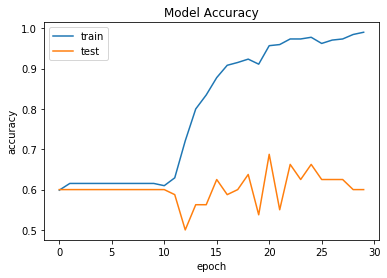

In [49]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


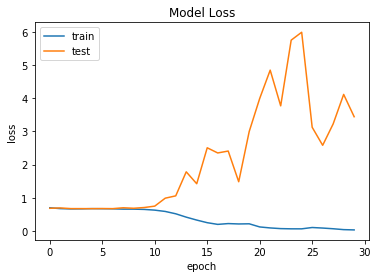

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()